# RQ 4 - Vulnerability Lifecycle Introduction
## 2. Top 10 PHP packages with the most CVE’s

In [11]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import utility as util
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go    # for data visualisation
import plotly.figure_factory as ff

In [12]:
#import data_set
data = pd.read_csv('../data/php/all.csv',encoding='latin1', low_memory=False)

## 2.1. Top 20 packages with the most vulnerabilities

In [13]:
#EXPLODE the packages column
pdata = util.tidy_split(data,column='package_slug',sep=',')
pdata=pdata[pdata['package_slug']!='nan']

### The following filters out all vulnerabilities with a low score (<7). If you need to run the charts over ALL data, skip the next chunk of code:

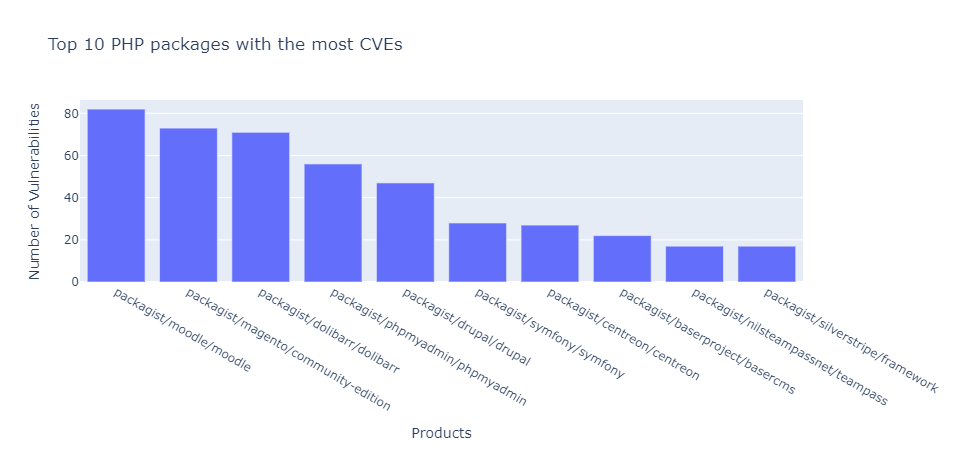

In [14]:
n=10  #adjust this to show top n
top_products_with_cves = pdata['package_slug'].value_counts().nlargest(n)

fig = go.Figure()
fig.add_bar(x=top_products_with_cves.index, y=top_products_with_cves.values)

fig.update_layout(title='Top {0:d} PHP packages with the most CVEs'.format(n),
                  xaxis = dict(title='Products'),
                  yaxis = dict(title='Number of Vulnerabilities'))

## 2.2. Top 20 vendors with the most vulnerabilities



In [5]:
#EXPLODE the vendor column
vdata = util.tidy_split(data,column='vendor',sep=',')
vdata = vdata[vdata.vendor!='nan']

As above, skip the following to include all vulnerabilities:

In [6]:
toDrop = vdata[ vdata['cvss3_bscore'] < 7.0].index 
vdata.drop(toDrop , inplace=True)
toDrop = vdata[ vdata['cvss2_bscore'] < 7.0].index
vdata.drop(toDrop , inplace=True)

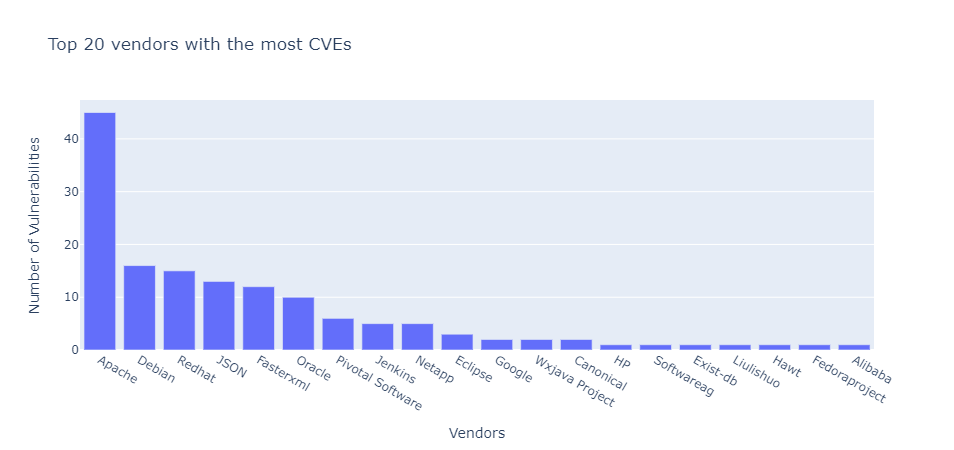

In [7]:
n=20  #adjust this to show top n

top_vendors_with_cwes = vdata['vendor'].value_counts().nlargest(n)

fig = go.Figure()
fig.add_bar(x=top_vendors_with_cwes.index, y=top_vendors_with_cwes.values)

fig.update_layout(title='Top {0:d} vendors with the most CVEs'.format(n),
                  xaxis = dict(title='Vendors'),
                  yaxis = dict(title='Number of Vulnerabilities'))